## Exploring TIme Series Forecasting: A Comprehensive Study with Practical Datasets

In [2]:
#Import packages 
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
#Import the datasets
data_sales = pd.read_csv('/Users/ben_nicholson/Visual_Code_Projects/Applied Statistics & Modeling/Project 2/dataset_a_sales_data.csv')
data_stocks = pd.read_csv('/Users/ben_nicholson/Visual_Code_Projects/Applied Statistics & Modeling/Project 2/dataset_b_stock_prices.csv')
data_electricity = pd.read_csv('/Users/ben_nicholson/Visual_Code_Projects/Applied Statistics & Modeling/Project 2/dataset_c_electricity_consumption.csv')
data_airline = pd.read_csv('/Users/ben_nicholson/Visual_Code_Projects/Applied Statistics & Modeling/Project 2/dataset_d_airline_passenger_traffic.csv')

In [4]:
#Create a function to graph the data
def time_series_line(x_data,y_data,title,x_title,y_title):
    plt.figure(figsize=(10,6))
    plt.plot(x_data,y_data)
    plt.title(title)
    plt.xlabel(x_title)
    plt.ylabel(y_title)
    plt.grid()
    plt.show()

In [5]:
#Create the Dickey Fuller test to use on data
#Regression type is c, ct, ctt, n
#constant, constant and trend, constant and linear and quadratic trend, no constant and no trend

from statsmodels.tsa.stattools import adfuller

def adf_test(data):
    """Using the ADF test to determine if a series is stationary"""
    test_results = adfuller(data)
    print('ADF Statistic: ',test_results[0])
    print('P-Value: ',test_results[1])
    print('Critical Value: ',)
    for thres,adf_stat in test_results[4].items():
       print('\t%s: %.2f' % (thres,adf_stat))

In [6]:
#Create a function for the rolling mean values
#These can be used to create a better understanding of the type of time series that is present

def roll_mean_std_dev(df_column,window):
    plt.figure(figsize=(10,6))
    #Look at the mean and the standard deviation of this data
    rolmean = df_column.rolling(window).mean()
    rolstd = df_column.rolling(window).std()

    #Let's check the stationarity of the graph
    #Plot the rolling statistics
    orig = plt.plot(df_column,color='blue',label='Original')
    mean = plt.plot(rolmean,color='red',label='Rolling Mean')
    std = plt.plot(rolstd,color='black',label='Rolling Std')
    plt.legend(loc='best')
    plt.title(f'Rolling Mean & Standard Deviation')
    plt.show(block=False)

## 0. Decompose the four models

In [72]:
#Createa function that decomposes the data and graphs the separation

import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose

def plot_decomposed_data(ts, model='additive', figsize=(10, 8)):
    """
    Decompose a time series and plot its components.

    Parameters:
        ts (pandas.Series): The time series to decompose.
        model (str): The decomposition model. Either 'additive' or 'multiplicative'.
        figsize (tuple): Figure size for the plot.

    Returns:
        None
    """
    # Decompose the time series
    decomposed = seasonal_decompose(ts, model=model)

    # Plot the decomposed components
    plt.figure(figsize=figsize)
    plt.subplot(411)
    plt.plot(ts, label='Original')
    plt.legend(loc='best')
    plt.subplot(412)
    plt.plot(decomposed.trend, label='Trend')
    plt.legend(loc='best')
    plt.subplot(413)
    plt.plot(decomposed.seasonal,label='Seasonality')
    plt.legend(loc='best')
    plt.subplot(414)
    plt.plot(decomposed.resid, label='Residuals')
    plt.legend(loc='best')
    plt.tight_layout()
    plt.show()


In [76]:
#Createa function that decomposes the data and graphs the separation

import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose

def decomposed_data(ts, model='additive', figsize=(10, 8)):
    """
    Decompose a time series and plot its components.

    Parameters:
        ts (pandas.Series): The time series to decompose.
        model (str): The decomposition model. Either 'additive' or 'multiplicative'.
        figsize (tuple): Figure size for the plot.

    Returns:
        None
    """
    # Decompose the time series
    decomposed = seasonal_decompose(ts, model=model)

    return decomposed


### 0.1 - Sales Dataset

In [8]:
#Observe the first few values
data_sales.head(5)

,Date,Sales
0,2015-01-31,3732
1,2015-02-28,3607
2,2015-03-31,2653
3,2015-04-30,4264
4,2015-05-31,1835


In [9]:
#Set the index and drop the column 'date' so that we are able to look at the data
data_sales.set_index(pd.to_datetime(data_sales['Date']),inplace=True)
data_sales.drop(columns='Date',inplace=True)
data_sales.head()

,Sales
Date,
2015-01-31,3732
2015-02-28,3607
2015-03-31,2653
2015-04-30,4264
2015-05-31,1835


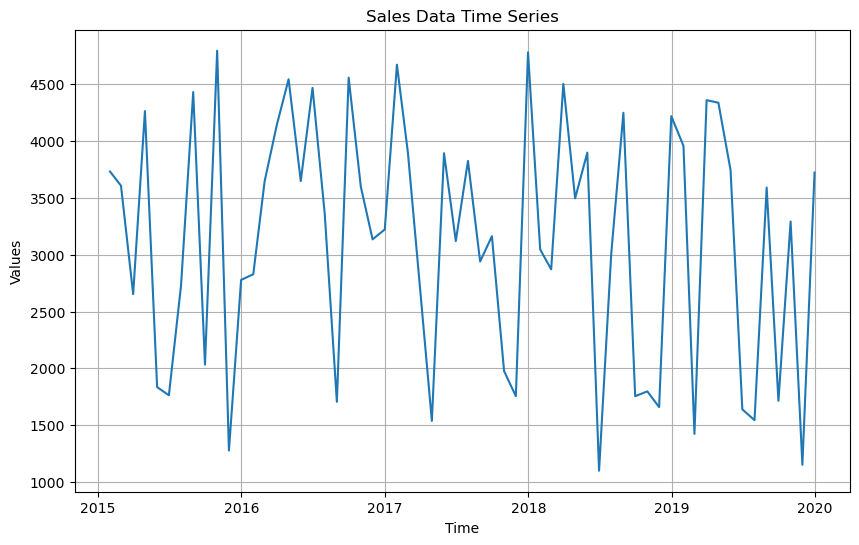

In [10]:
#Plot the data
time_series_line(data_sales.index,data_sales['Sales'],'Sales Data Time Series','Time','Values')

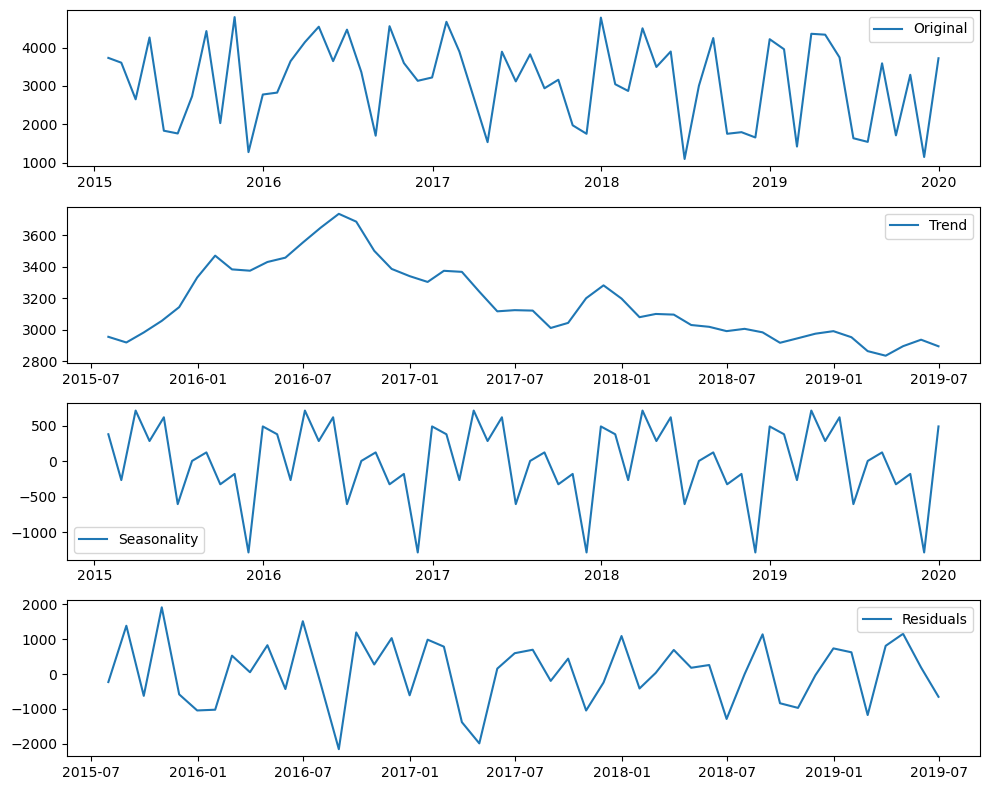

In [78]:
#Plot the decomposed data
plot_decomposed_data(data_sales['Sales'])

When you first observe the data, you might assume that there is some seasonality that is described in the 3rd graph as the residuals seem to oscilate above and below a mean of 0. However, if you look further you can see that these residual oscillations are taking place between 500 and 2000 sales above and belove the mean. Which I am now going to represent the residuals as a percentage of the original data to get a better understanding of how far off the decomposition model is.

In [85]:
#Create a variable that has a list of the different series created
sales_decomposed_data = decomposed_data(data_sales['Sales'])

residuals = sales_decomposed_data.resid
original_values = data_sales['Sales']

#Create a new dataframe that has residual and the original data
#Then find the percentage representaiton of the data

sales_decomposed_data_df = pd.DataFrame(sales_decomposed_data.resid)
sales_decomposed_data_df['resid pct'] = [(residual / original_value) * 100 for residual, original_value in zip(residuals, original_values)]


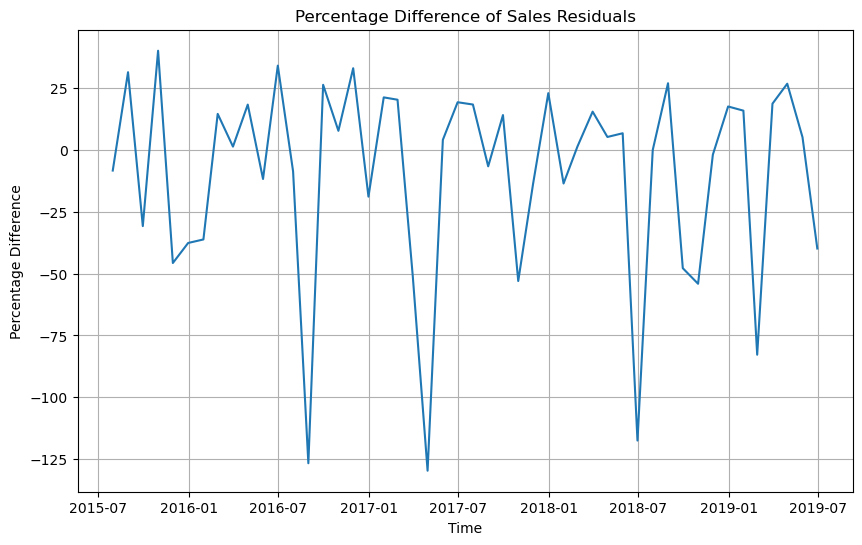

In [94]:
time_series_line(sales_decomposed_data_df.index,sales_decomposed_data_df['resid pct'],'Percentage Difference of Sales Residuals', 'Time', 'Percentage Difference')

A part from the 3 large negative oscillations the residuals fell mainly between -10% and 25% which is not that accurate of a model. Next it is time to look at the ACF plot to see if there is any correlation and finally the ADF test. If all of these come back representing what I assume to be results that represent no seasonality then this data is likely to be stationary. The trend that is exhibited is only 9% increase from the mean of 3000 while the residuals have much greater changes than that which is likely to represent a graph that is stationary and does not exhibit any of the linear trend, cyclical changes or seasonality that is being tested for.

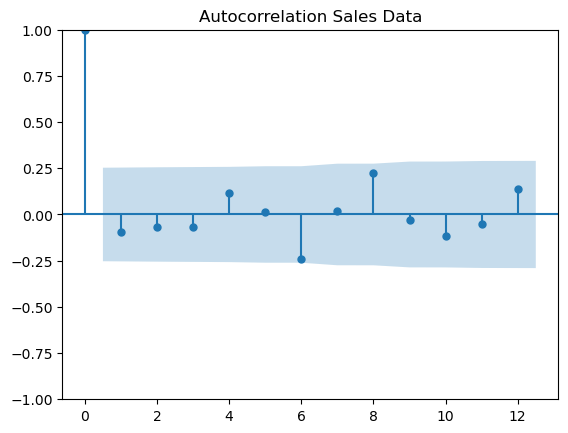

In [95]:
#First have to import the neccessary packages which are specific to finding acf and pacf
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

#Plot the ACF using a lag of 12 which would suggest if one month was particular related to the result of the same month the next year
plot_acf(data_sales['Sales'],lags=12, title='Autocorrelation Sales Data') #lags is representative of the yearly difference
plt.show()

In [11]:
#Look at the Dickey Fuller test to observe the stationarity of the graph
adf_test(data_sales['Sales'])

ADF Statistic:  -8.325005277374798
P-Value:  3.489721856712595e-13
Critical Value: 
	1%: -3.55
	5%: -2.91
	10%: -2.59


With all of the tests that have been done. There seems to be no seasonality, which is proven by the auto correlation and the large residual values that were given in the decomposition of the data. The linear trend has a small peak of about 9% but as the residuals extend far greater than this it is fair to assume that there is no linear movement in the data, further proven by the ADF test returning a statistic far higher than what is required to have 99% confidence that the graph is stationary. There is no cyclical change either depicted by the visualtion of the graph and the linear trend.

### 0.2 - Stocks Data

In [12]:
#Observe the overall data that is in the stocks data folder
data_stocks

,Date,Closing Price
0,2017-01-01,112.553301
1,2017-01-02,158.048674
2,2017-01-03,50.017156
3,2017-01-04,95.349886
4,2017-01-05,72.013384
...,...,...
1090,2019-12-27,140.327548
1091,2019-12-28,194.535063
1092,2019-12-29,101.851882
1093,2019-12-30,139.343765


In [13]:
#Immediately there seems to be a lot more data values that are present in this dataset
data_stocks.set_index(pd.to_datetime(data_stocks['Date']),inplace=True)
data_stocks.drop(columns='Date',inplace=True)
data_stocks

,Closing Price
Date,
2017-01-01,112.553301
2017-01-02,158.048674
2017-01-03,50.017156
2017-01-04,95.349886
2017-01-05,72.013384
...,...
2019-12-27,140.327548
2019-12-28,194.535063
2019-12-29,101.851882


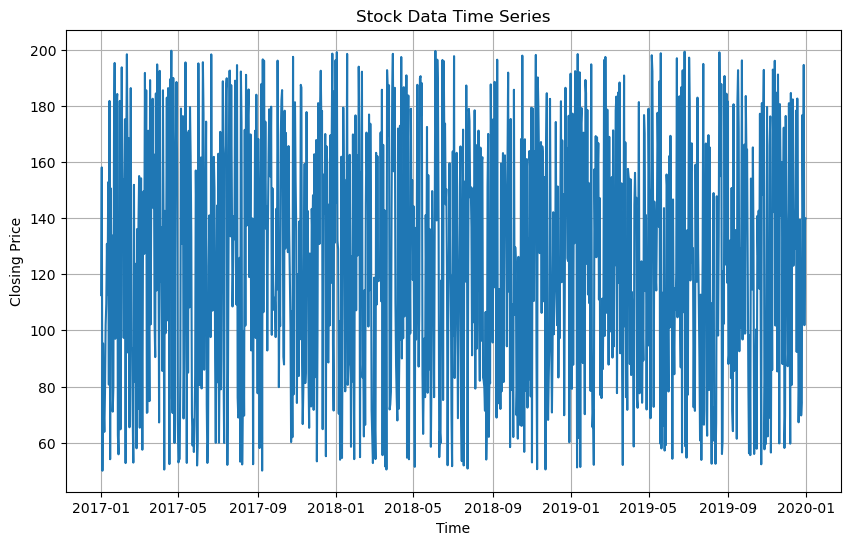

In [14]:
#Graph the graph
time_series_line(data_stocks.index,data_stocks['Closing Price'],'Stock Data Time Series','Time','Closing Price')

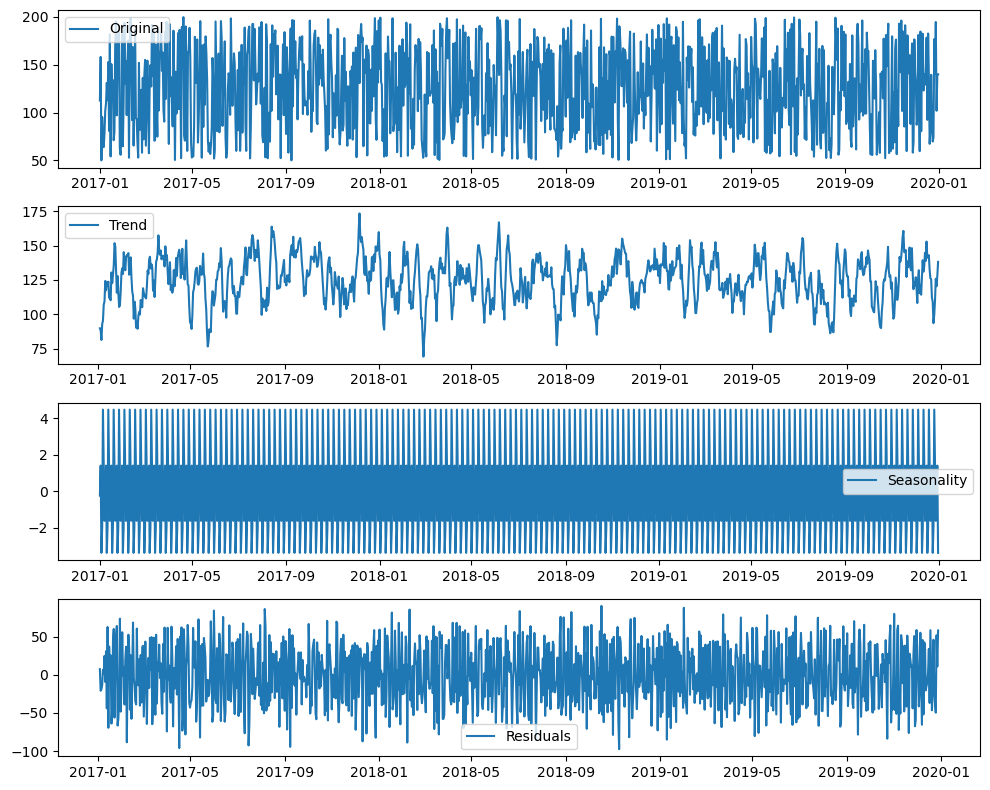

In [91]:
#Plot the decomposed data using the function from before
plot_decomposed_data(data_stocks['Closing Price'])

The decomposition is enough proof that there is no clyclical changes, seasonality or trend

In [89]:
#Use the ADF test to show how stationary the data is
adf_test(data_stocks['Closing Price'])

ADF Statistic:  -22.340369622532915
P-Value:  0.0
Critical Value: 
	1%: -3.44
	5%: -2.86
	10%: -2.57


### 0.3 Electricity Data

In [16]:
#Observe the overall setup of the data
data_electricity

,Date,Consumption
0,2018-01-01 00:00:00,114
1,2018-01-01 01:00:00,141
2,2018-01-01 02:00:00,70
3,2018-01-01 03:00:00,104
4,2018-01-01 04:00:00,73
...,...,...
17492,2019-12-30 20:00:00,94
17493,2019-12-30 21:00:00,143
17494,2019-12-30 22:00:00,106
17495,2019-12-30 23:00:00,84


In [17]:
#Create an index that can be used in the plotting of the data
data_electricity.set_index(pd.to_datetime(data_electricity['Date']),inplace=True)
data_electricity.drop(columns='Date',inplace=True)
data_electricity

,Consumption
Date,
2018-01-01 00:00:00,114
2018-01-01 01:00:00,141
2018-01-01 02:00:00,70
2018-01-01 03:00:00,104
2018-01-01 04:00:00,73
...,...
2019-12-30 20:00:00,94
2019-12-30 21:00:00,143
2019-12-30 22:00:00,106


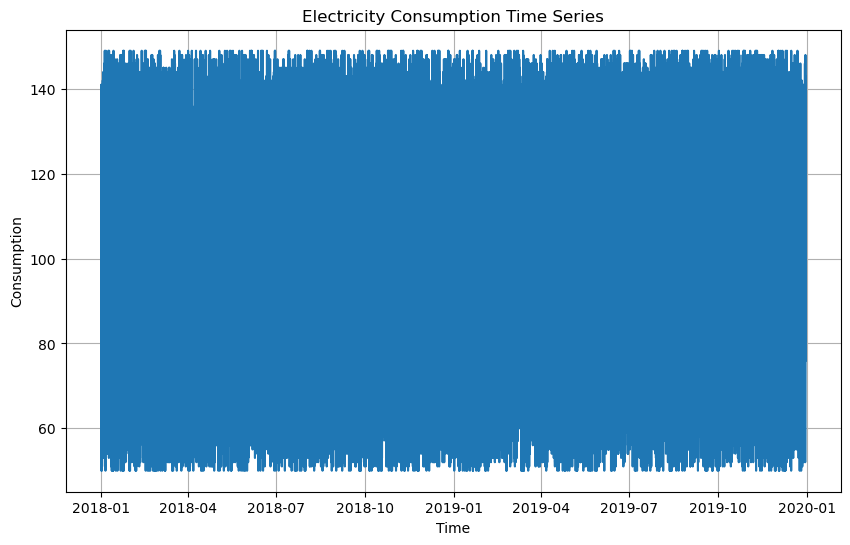

In [18]:
#Create a time series of the graph
time_series_line(data_electricity.index,data_electricity['Consumption'],'Electricity Consumption Time Series','Time','Consumption')

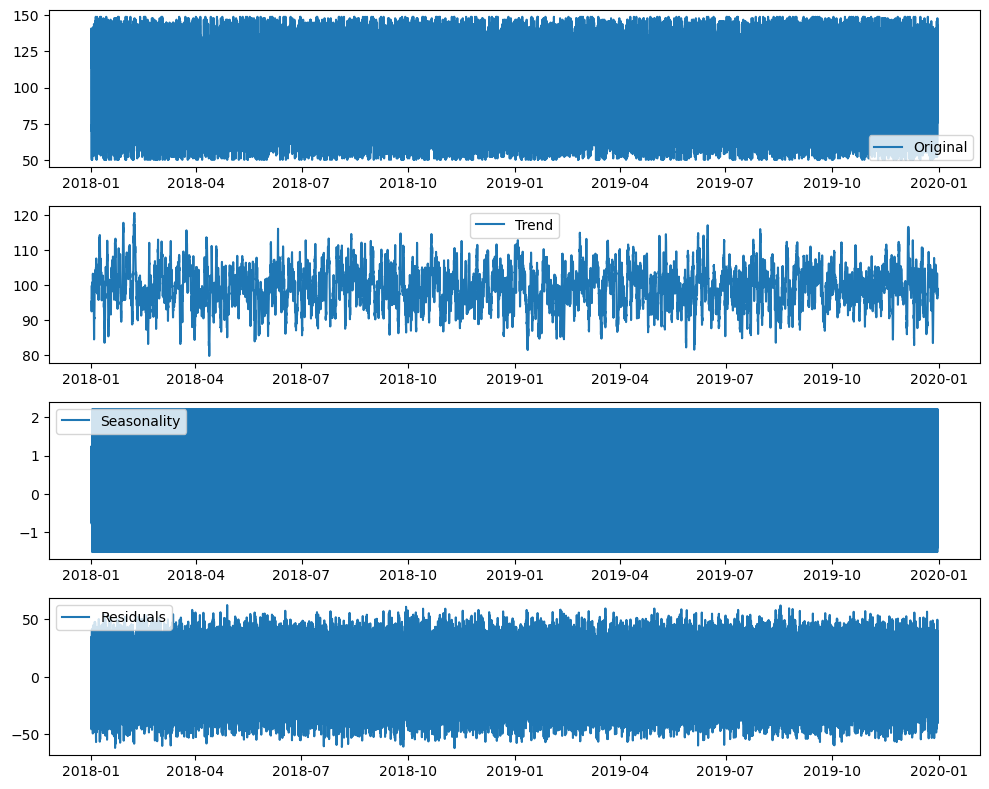

In [92]:
#Plot the decomposed data using the function from before
plot_decomposed_data(data_electricity['Consumption'])

The decomposed data is enough to prove that there is no cyclical changes, linear trend and seasonality. Further proven the ADF test below.

In [19]:
adf_test(data_electricity['Consumption'])

ADF Statistic:  -131.64004315876778
P-Value:  0.0
Critical Value: 
	1%: -3.43
	5%: -2.86
	10%: -2.57


You can see how high the ADF statistic is which suggests that graph is stationary. There is no trend, cycle or seasonality to the data.

### 0.4 - Airline Data

In [20]:
data_airline

,Date,Passengers
0,2010-01-31,1480
1,2010-02-28,1358
2,2010-03-31,828
3,2010-04-30,1729
4,2010-05-31,385
...,...,...
115,2019-08-31,1917
116,2019-09-30,217
117,2019-10-31,616
118,2019-11-30,735


In [21]:
#Create an index that can be used in the plotting of the data
data_airline.set_index(pd.to_datetime(data_airline['Date']),inplace=True)
data_airline.drop(columns='Date',inplace=True)
data_airline

,Passengers
Date,
2010-01-31,1480
2010-02-28,1358
2010-03-31,828
2010-04-30,1729
2010-05-31,385
...,...
2019-08-31,1917
2019-09-30,217
2019-10-31,616


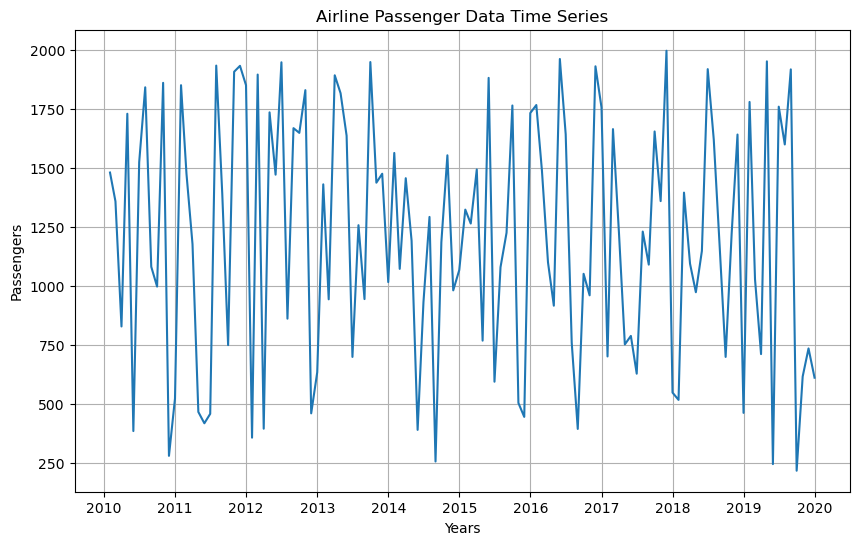

In [22]:
time_series_line(data_airline.index,data_airline['Passengers'],'Airline Passenger Data Time Series','Years','Passengers')

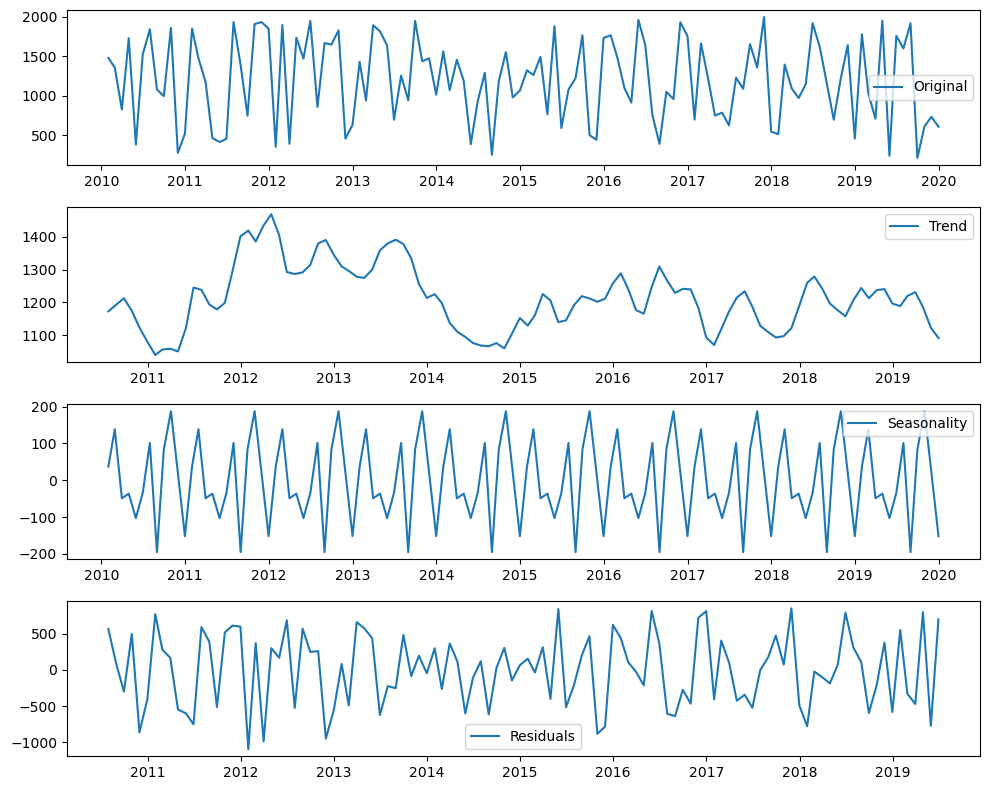

In [93]:
plot_decomposed_data(data_airline['Passengers'])

Similar to the first data set, the residuals show such a large change compared to the change in trend, it can be assumed that the seasonality has been artificially created and does not accurately depict any seasonality in the data.

In [23]:
adf_test(data_airline['Passengers'])

ADF Statistic:  -7.600002845561867
P-Value:  2.403322262296728e-11
Critical Value: 
	1%: -3.49
	5%: -2.89
	10%: -2.58


The high ADF test can give 99% confidence that the data is stationary alongside the decomposition it is fair to assume there is no trend, seasonality or cyclical changes in the data

## 1. Basics of Moving Averages
- Use Dataset A to calculate and plot simple moving averages with different window sizes.
- Discuss the impact of window size on the smoothness of the trend.

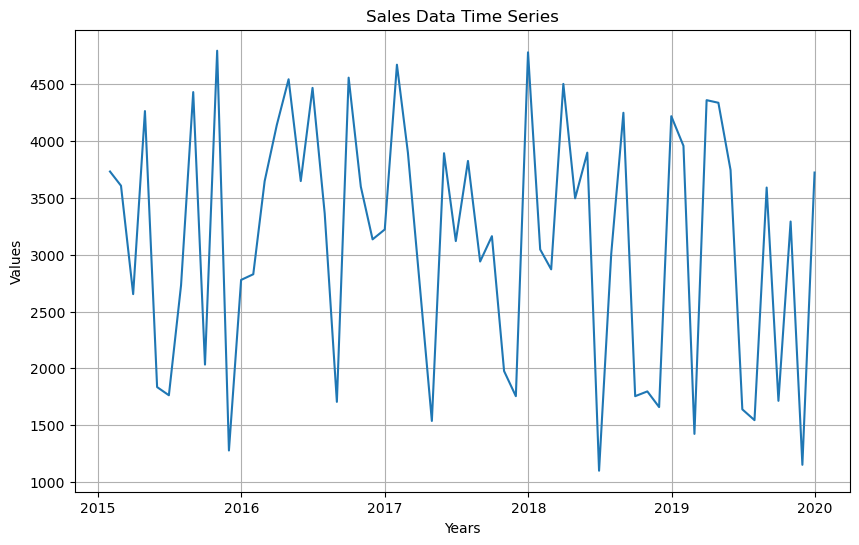

In [24]:
#Create a time series of the original graph
time_series_line(data_sales.index,data_sales['Sales'],'Sales Data Time Series','Years','Values')

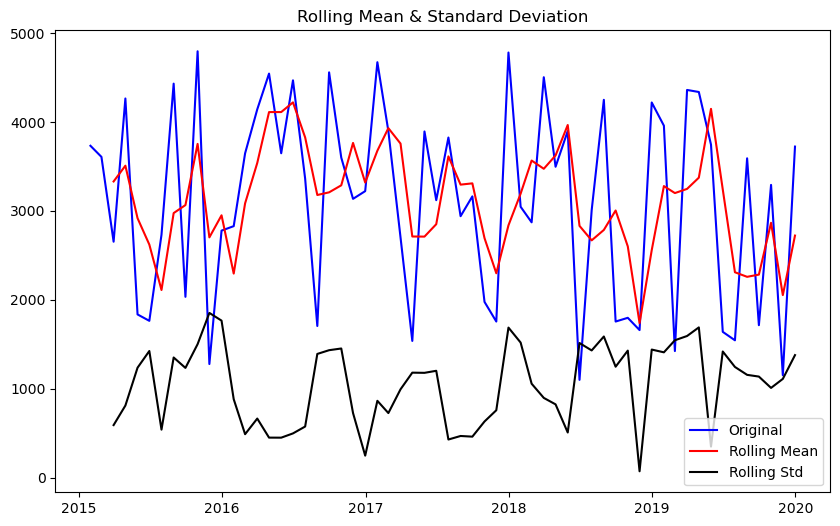

In [25]:
#Create a moving average and moving standard deviation with window period as 3
#This reflects a quarterly mean
roll_mean_std_dev(data_sales['Sales'],3)

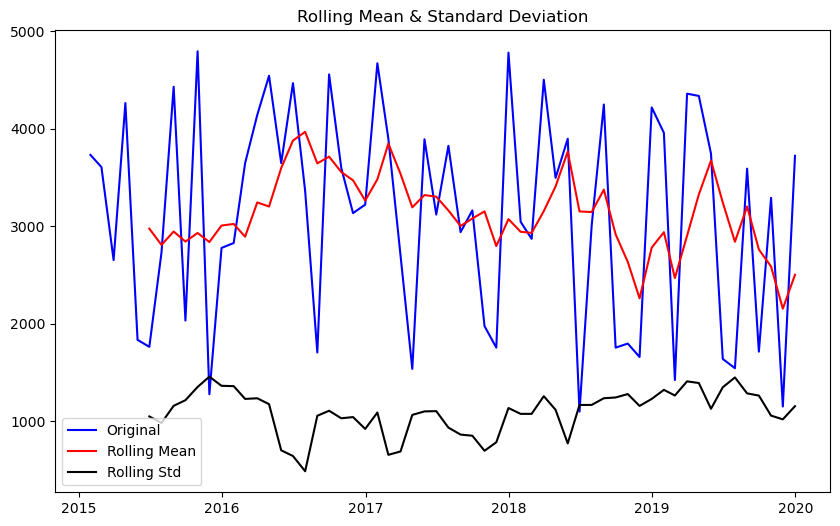

In [26]:
#Create a moving average and moving standard deviation with window period as 6
#This reflects a moving average from the past 6 months
roll_mean_std_dev(data_sales['Sales'],6)

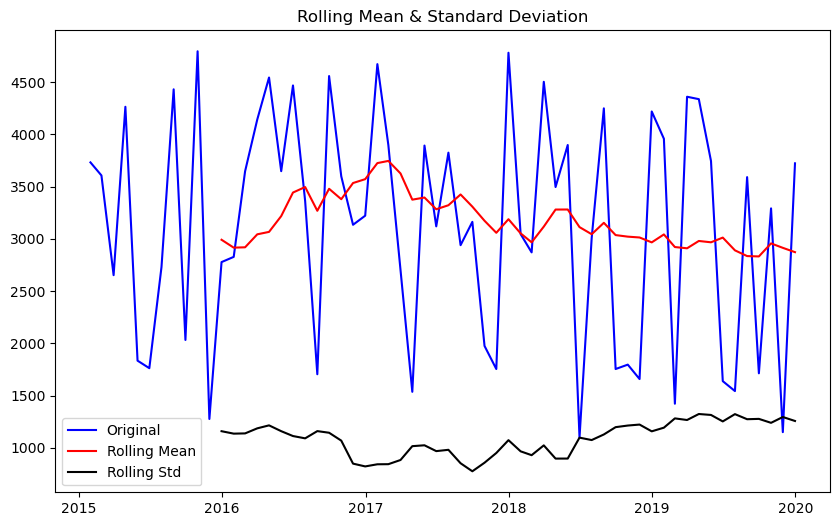

In [27]:
#Create a moving average and moving standard deviation with window period as 12
#This reflects a moving average over the past year
roll_mean_std_dev(data_sales['Sales'],12)

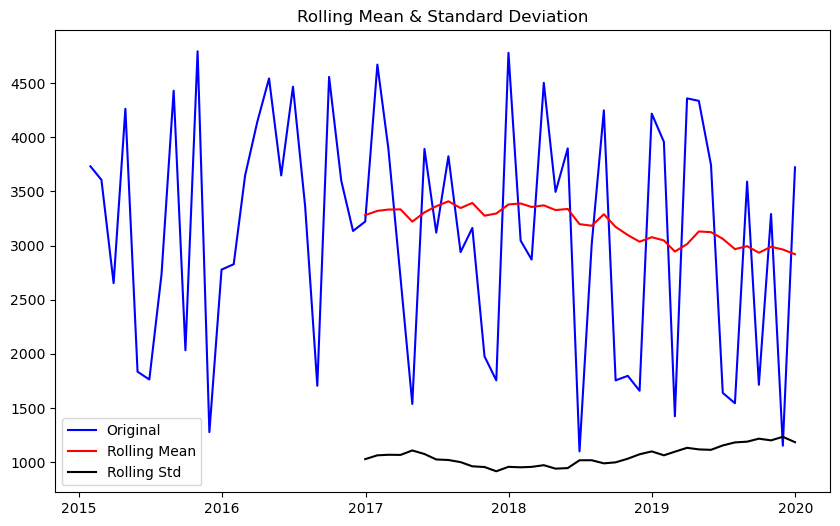

In [28]:
#Create a moving average and moving standard deviation with window period as 24
#This reflects a moving average over the past 2 years
roll_mean_std_dev(data_sales['Sales'],24)

You can observe how the moving average becomes more and more smooth as the window icnreases. This is because more data goes into the rolling average. For example when the window is 3 that takes the data from the past 3 months and averages it which would still allow for big movements in the graph to be reflected in the rolling mean. Where as when the window gets to 24, which is a reflection of the average over the past 2 years up until that point, the mean and standard deviation becomes very consistient as the large fluctuations are mitigated by the number of points that have gone into that average.

## 2. Introduction to Exponential Smoothing
- Apply single exponential smoothing on Dataset B and compare it with moving averages.

In [29]:
data_stocks

,Closing Price
Date,
2017-01-01,112.553301
2017-01-02,158.048674
2017-01-03,50.017156
2017-01-04,95.349886
2017-01-05,72.013384
...,...
2019-12-27,140.327548
2019-12-28,194.535063
2019-12-29,101.851882


In [30]:
# Split train and test
train = data_stocks.iloc[:-int(len(data_stocks) * 0.2)]
test = data_stocks.iloc[-int(len(data_stocks) * 0.2):]

In [31]:
from statsmodels.tsa.holtwinters import SimpleExpSmoothing, Holt, ExponentialSmoothing
# Fit simple model and get forecasts
model_simple = SimpleExpSmoothing(train['Closing Price']).fit(optimized=True)
forecasts_simple = model_simple.forecast(len(test))

/Users/ben_nicholson/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


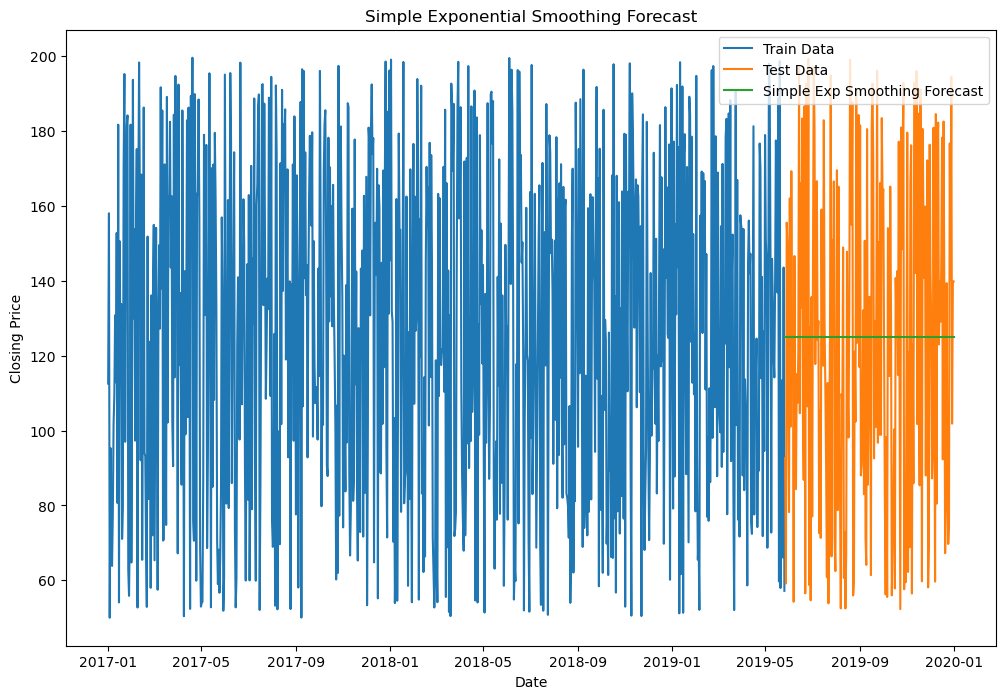

In [32]:
plt.figure(figsize=(12,8))
# Plotting actual data
plt.plot(train.index, train['Closing Price'], label='Train Data')
plt.plot(test.index, test['Closing Price'], label='Test Data')

# Plotting forecasts
plt.plot(test.index, forecasts_simple, label='Simple Exp Smoothing Forecast')

plt.title('Simple Exponential Smoothing Forecast')
plt.xlabel('Date')
plt.ylabel('Closing Price')
plt.legend()
plt.show()

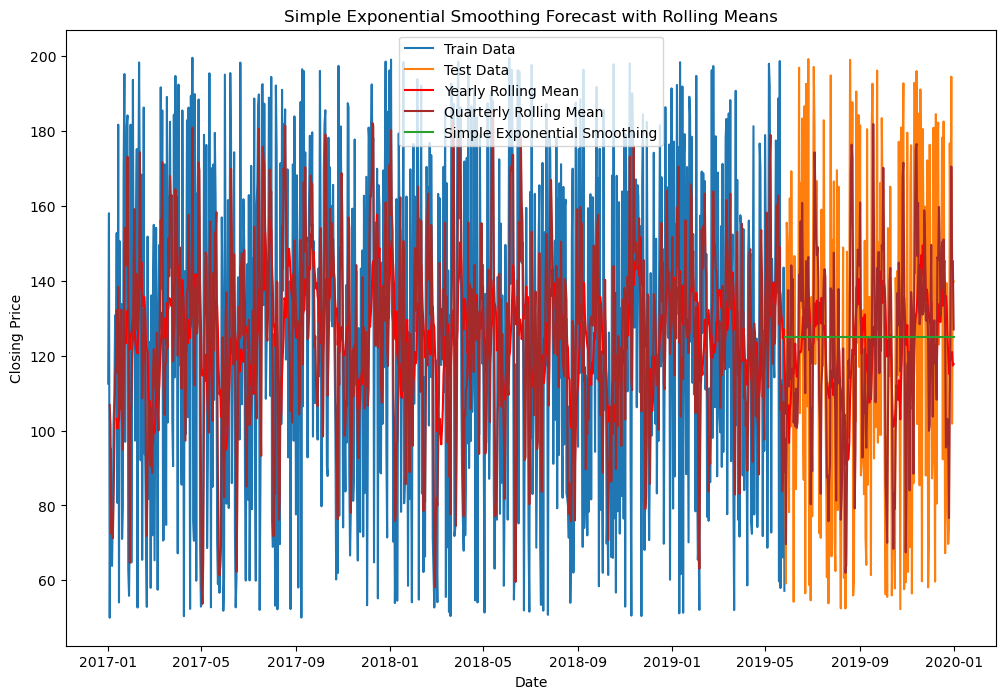

In [33]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12,8))
# Plotting actual data
plt.plot(train.index, train['Closing Price'], label='Train Data')
plt.plot(test.index, test['Closing Price'], label='Test Data')

rolmean = data_stocks['Closing Price'].rolling(12).mean()
mean = plt.plot(rolmean,color='red',label='Yearly Rolling Mean')

rolmean_2 = data_stocks['Closing Price'].rolling(3).mean()
mean_2 = plt.plot(rolmean_2,color='brown',label='Quarterly Rolling Mean')


# Plotting forecasts
plt.plot(test.index, forecasts_simple, label='Simple Exponential Smoothing')

plt.title('Simple Exponential Smoothing Forecast with Rolling Means')
plt.xlabel('Date')
plt.ylabel('Closing Price')
plt.legend()
plt.show()


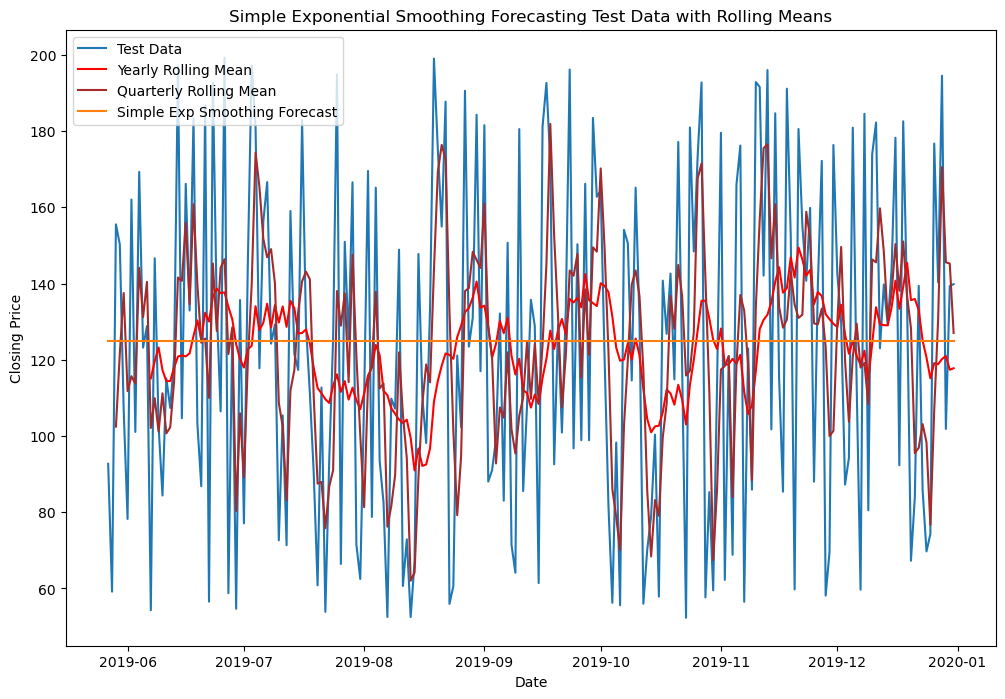

In [34]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12,8))
# Plotting actual data
plt.plot(test.index, test['Closing Price'], label='Test Data')

rolmean = test['Closing Price'].rolling(12).mean()
mean = plt.plot(rolmean,color='red',label='Yearly Rolling Mean')

rolmean_2 = test['Closing Price'].rolling(3).mean()
mean_2 = plt.plot(rolmean_2,color='brown',label='Quarterly Rolling Mean')


# Plotting forecasts
plt.plot(test.index, forecasts_simple, label='Simple Exp Smoothing Forecast')

plt.title('Simple Exponential Smoothing Forecasting Test Data with Rolling Means')
plt.xlabel('Date')
plt.ylabel('Closing Price')
plt.legend()
plt.show()


## 3. Understanding SImple Exponential Smoothing (SES)
- Implement SES on Dataset C and analyze its responsiveness to changes in data.

In [35]:
data_electricity

,Consumption
Date,
2018-01-01 00:00:00,114
2018-01-01 01:00:00,141
2018-01-01 02:00:00,70
2018-01-01 03:00:00,104
2018-01-01 04:00:00,73
...,...
2019-12-30 20:00:00,94
2019-12-30 21:00:00,143
2019-12-30 22:00:00,106


In [36]:
train = data_electricity.iloc[:-int(len(data_electricity) * 0.2)]
test = data_electricity.iloc[-int(len(data_electricity) * 0.2):]

In [37]:
from statsmodels.tsa.holtwinters import SimpleExpSmoothing, Holt, ExponentialSmoothing
# Fit simple model and get forecasts
model_simple = SimpleExpSmoothing(train['Consumption']).fit(optimized=True)
forecasts_simple = model_simple.forecast(len(test))

/Users/ben_nicholson/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  self._init_dates(dates, freq)


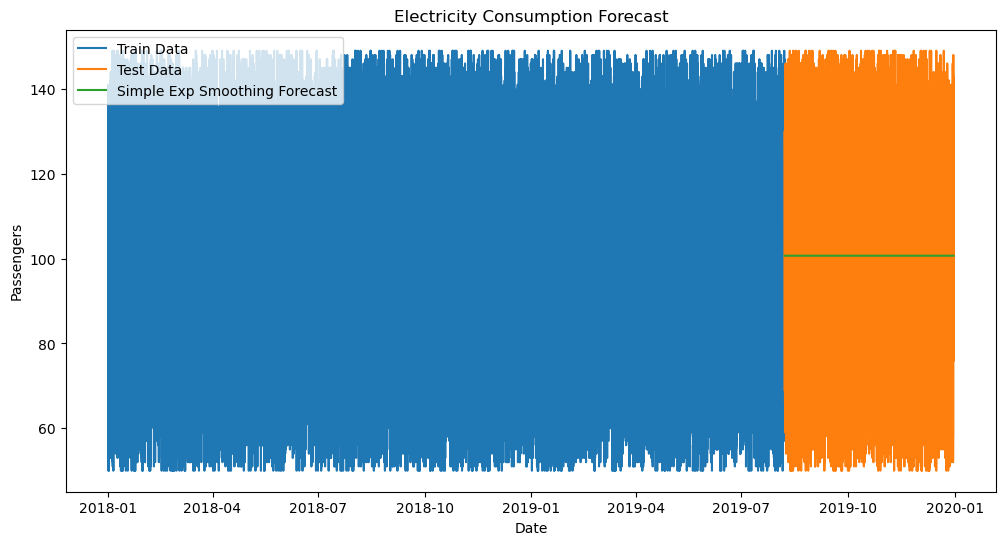

In [38]:
import matplotlib.pyplot as plt

# Plot actual values
plt.figure(figsize=(12, 6))
plt.plot(train.index, train['Consumption'], label='Train Data')
plt.plot(test.index, test['Consumption'], label='Test Data')
plt.plot(test.index, forecasts_simple, label='Simple Exp Smoothing Forecast')

plt.title('Electricity Consumption Forecast')
plt.xlabel('Date')
plt.ylabel('Passengers')
plt.legend()
plt.show()

In [39]:
train_2 = data_electricity.iloc[:int(len(data_electricity) * 0.6)].append(data_electricity.iloc[-int(len(data_electricity) * 0.8):])
test_2 = data_electricity.iloc[int(len(data_electricity) * 0.6):int(len(data_electricity) * 0.8)]

/var/folders/6q/lw13gkln44z1r6ncfrmcbc5w0000gn/T/ipykernel_15805/2959074735.py:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  train_2 = data_electricity.iloc[:int(len(data_electricity) * 0.6)].append(data_electricity.iloc[-int(len(data_electricity) * 0.8):])


In [40]:
model_simple_2 = SimpleExpSmoothing(train_2['Consumption']).fit(optimized=True)
forecasts_simple_2 = model_simple_2.forecast(len(test_2))

/Users/ben_nicholson/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/ben_nicholson/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/ben_nicholson/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


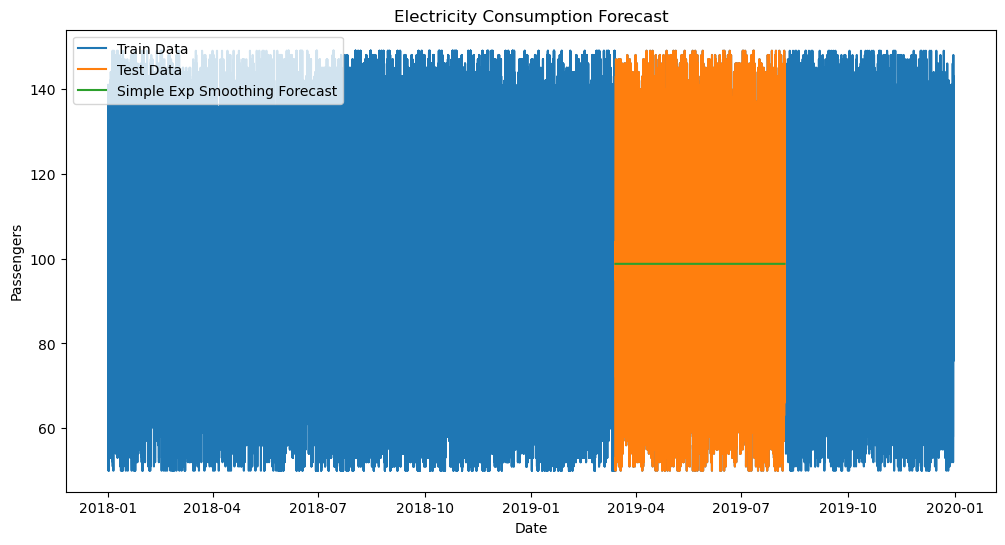

In [41]:
# Plot actual values
plt.figure(figsize=(12, 6))
plt.plot(train_2.index, train_2['Consumption'], label='Train Data')
plt.plot(test_2.index, test_2['Consumption'], label='Test Data')
plt.plot(test_2.index, forecasts_simple_2, label='Simple Exp Smoothing Forecast')

plt.title('Electricity Consumption Forecast')
plt.xlabel('Date')
plt.ylabel('Passengers')
plt.legend()
plt.show()

## 4. Exploring Holt's Linear Trend Model
- Apply Holt’s Linear Trend Model to Dataset D and discuss its ability to capture both level and trend.
- Explanation: Holt’s model extends exponential smoothing by incorporating a trend component, allowing for more accurate forecasting when data exhibits a trend over time.

In [42]:
from statsmodels.tsa.holtwinters import SimpleExpSmoothing, Holt
data_airline

,Passengers
Date,
2010-01-31,1480
2010-02-28,1358
2010-03-31,828
2010-04-30,1729
2010-05-31,385
...,...
2019-08-31,1917
2019-09-30,217
2019-10-31,616


In [43]:
train = data_airline.iloc[:-int(len(data_airline) * 0.2)]
test = data_airline.iloc[-int(len(data_airline) * 0.2):]

In [44]:
model_simple = SimpleExpSmoothing(train['Passengers']).fit(optimized=True)
forecasts_simple = model_simple.forecast(len(test))

/Users/ben_nicholson/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)


In [45]:
# Fit Holt's model and get forecasts
model_holt = Holt(train['Passengers'], damped_trend=True).fit(optimized=True)
print(model_holt.summary())
forecasts_holt = model_holt.forecast(len(test))

                              Holt Model Results                              
Dep. Variable:             Passengers   No. Observations:                   96
Model:                           Holt   SSE                       29806474.807
Optimized:                       True   AIC                           1224.005
Trend:                       Additive   BIC                           1236.827
Seasonal:                        None   AICC                          1225.278
Seasonal Periods:                None   Date:                 Mon, 01 Apr 2024
Box-Cox:                        False   Time:                         10:06:55
Box-Cox Coeff.:                  None                                         
                       coeff                 code              optimized      
------------------------------------------------------------------------------
smoothing_level            0.1494676                alpha                 True
smoothing_trend            0.1494676                

/Users/ben_nicholson/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)


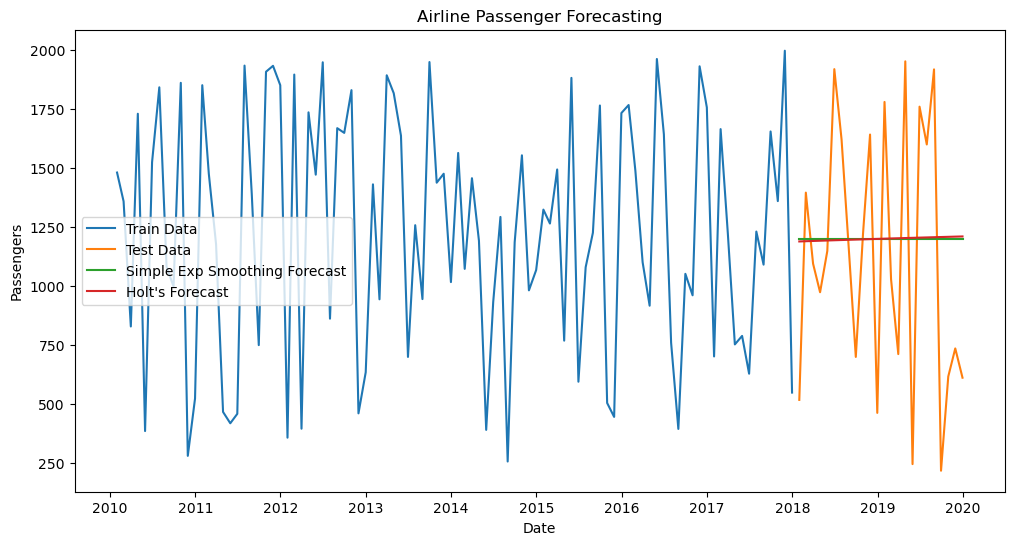

In [46]:
import matplotlib.pyplot as plt

# Plot actual values
plt.figure(figsize=(12, 6))
plt.plot(train.index, train['Passengers'], label='Train Data')
plt.plot(test.index, test['Passengers'], label='Test Data')
plt.plot(test.index, forecasts_simple, label='Simple Exp Smoothing Forecast')
plt.plot(test.index, forecasts_holt, label="Holt's Forecast")

plt.title('Airline Passenger Forecasting')
plt.xlabel('Date')
plt.ylabel('Passengers')
plt.legend()
plt.show()

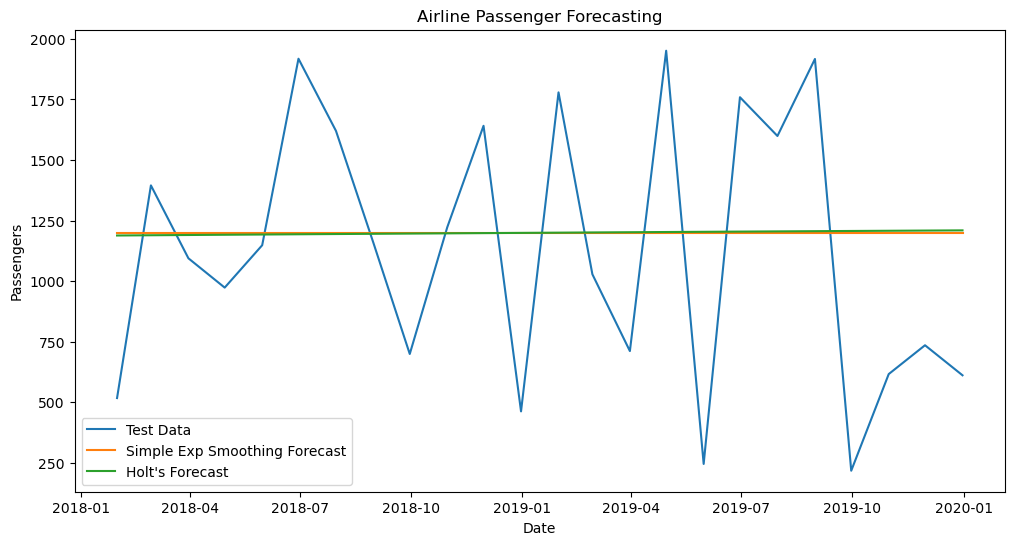

In [47]:
# Plot actual values
plt.figure(figsize=(12, 6))
plt.plot(test.index, test['Passengers'], label='Test Data')
plt.plot(test.index, forecasts_simple, label='Simple Exp Smoothing Forecast')
plt.plot(test.index, forecasts_holt, label="Holt's Forecast")

plt.title('Airline Passenger Forecasting')
plt.xlabel('Date')
plt.ylabel('Passengers')
plt.legend()
plt.show()

In [48]:
train_2 = data_airline.iloc[:-int(len(data_airline) * 0.3)]
test_2 = data_airline.iloc[-int(len(data_airline) * 0.3):]

In [49]:
model_simple_2 = SimpleExpSmoothing(train_2['Passengers']).fit(optimized=True)
forecasts_simple_2 = model_simple_2.forecast(len(test_2))

/Users/ben_nicholson/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)


In [50]:
# Fit Holt's model and get forecasts
model_holt_2 = Holt(train_2['Passengers'], damped_trend=True).fit(optimized=True)
print(model_holt_2.summary())
forecasts_holt_2 = model_holt_2.forecast(len(test_2))

                              Holt Model Results                              
Dep. Variable:             Passengers   No. Observations:                   84
Model:                           Holt   SSE                       27402000.180
Optimized:                       True   AIC                           1076.406
Trend:                       Additive   BIC                           1088.560
Seasonal:                        None   AICC                          1077.880
Seasonal Periods:                None   Date:                 Mon, 01 Apr 2024
Box-Cox:                        False   Time:                         10:06:55
Box-Cox Coeff.:                  None                                         
                       coeff                 code              optimized      
------------------------------------------------------------------------------
smoothing_level            0.1743666                alpha                 True
smoothing_trend            0.1734492                

/Users/ben_nicholson/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)


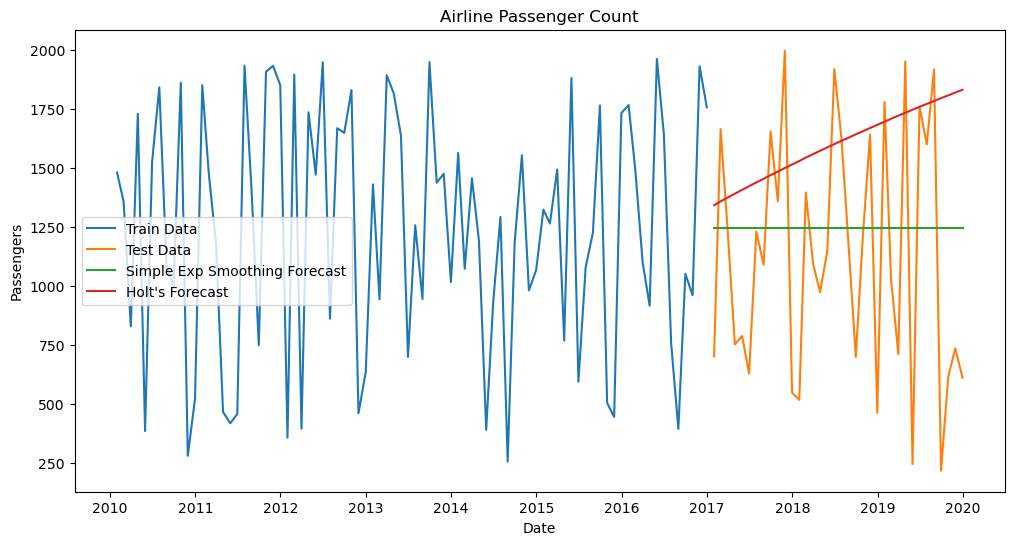

In [51]:
# Plot actual values
plt.figure(figsize=(12, 6))
plt.plot(train_2.index, train_2['Passengers'], label='Train Data')
plt.plot(test_2.index, test_2['Passengers'], label='Test Data')
plt.plot(test_2.index, forecasts_simple_2, label='Simple Exp Smoothing Forecast')
plt.plot(test_2.index, forecasts_holt_2, label="Holt's Forecast")

plt.title('Airline Passenger Count')
plt.xlabel('Date')
plt.ylabel('Passengers')
plt.legend()
plt.show()

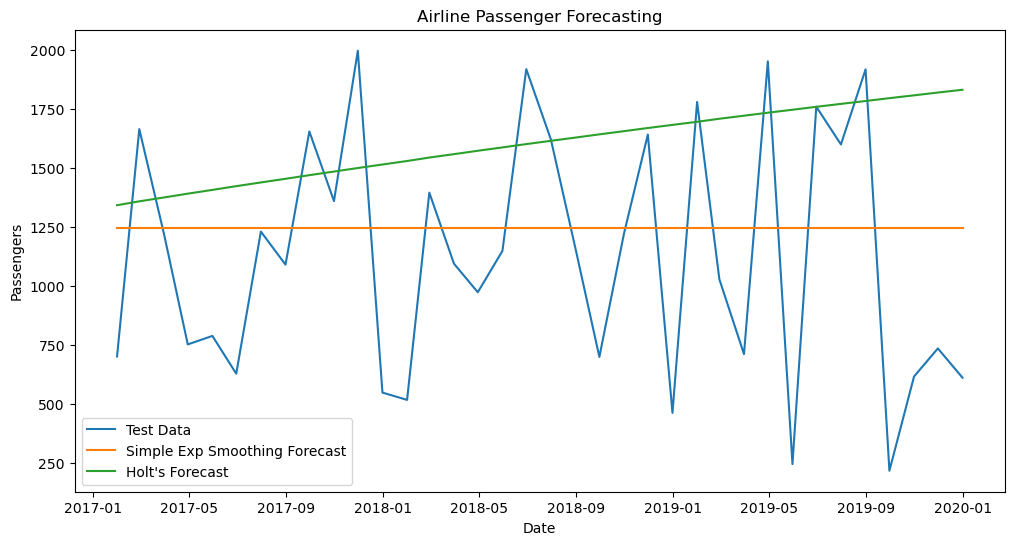

In [52]:
# Plot actual values
plt.figure(figsize=(12, 6))
plt.plot(test_2.index, test_2['Passengers'], label='Test Data')
plt.plot(test_2.index, forecasts_simple_2, label='Simple Exp Smoothing Forecast')
plt.plot(test_2.index, forecasts_holt_2, label="Holt's Forecast")

plt.title('Airline Passenger Forecasting')
plt.xlabel('Date')
plt.ylabel('Passengers')
plt.legend()
plt.show()

## 5. Diving into Holt-Winters Seasonal Model
- Use Dataset A to apply the Holt-Winters Seasonal Model, focusing on capturing seasonality in addition to level and trend.
- Description: The Holt-Winters seasonal model includes three components: level, trend, and seasonality, offering a comprehensive approach to forecasting time series data that exhibits seasonal patterns.

In [53]:
data_sales.head()

,Sales
Date,
2015-01-31,3732
2015-02-28,3607
2015-03-31,2653
2015-04-30,4264
2015-05-31,1835


In [54]:
train = data_sales.iloc[:-int(len(data_sales) * 0.2)]
test = data_sales.iloc[-int(len(data_sales) * 0.2):]

In [55]:
from statsmodels.tsa.holtwinters import SimpleExpSmoothing, Holt, ExponentialSmoothing
# Fit simple model and get forecasts
model_simple = SimpleExpSmoothing(train['Sales']).fit(optimized=True)
forecasts_simple = model_simple.forecast(len(test))

# Fit Holt's model and get forecasts
model_holt = Holt(train['Sales'], damped_trend=True).fit(optimized=True)
forecasts_holt = model_holt.forecast(len(test))

# Fit Holt Winters model and get forecasts
model_holt_winters = ExponentialSmoothing(train['Sales'], trend='mul',
                                          seasonal='mul', seasonal_periods=12)\
                                          .fit(optimized=True)
forecasts_holt_winters = model_holt_winters.forecast(len(test))

/Users/ben_nicholson/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
/Users/ben_nicholson/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
/Users/ben_nicholson/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
/Users/ben_nicholson/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/holtwinters/model.py:915: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


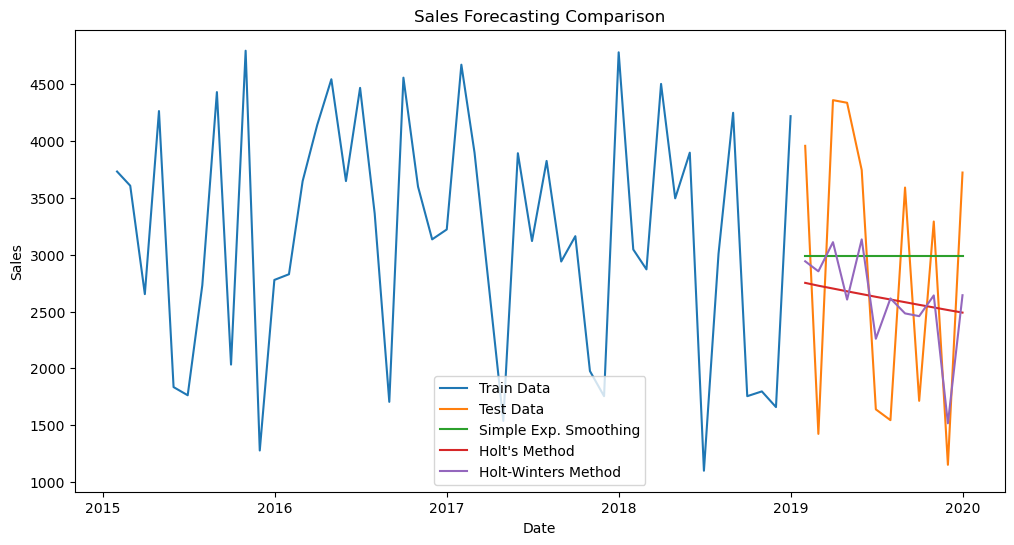

In [56]:
import matplotlib.pyplot as plt
plt.figure(figsize=(12, 6))

# Plot actual sales data
plt.plot(train['Sales'], label='Train Data')
plt.plot(test.index, test['Sales'], label='Test Data')

# Plot forecasts from Simple Exponential Smoothing
plt.plot(test.index, forecasts_simple, label='Simple Exp. Smoothing')

# Plot forecasts from Holt's model
plt.plot(test.index, forecasts_holt, label="Holt's Method")

# Plot forecasts from Holt-Winters model
plt.plot(test.index, forecasts_holt_winters, label="Holt-Winters Method")

plt.xlabel('Date')
plt.ylabel('Sales')
plt.title('Sales Forecasting Comparison')
plt.legend()
plt.show()

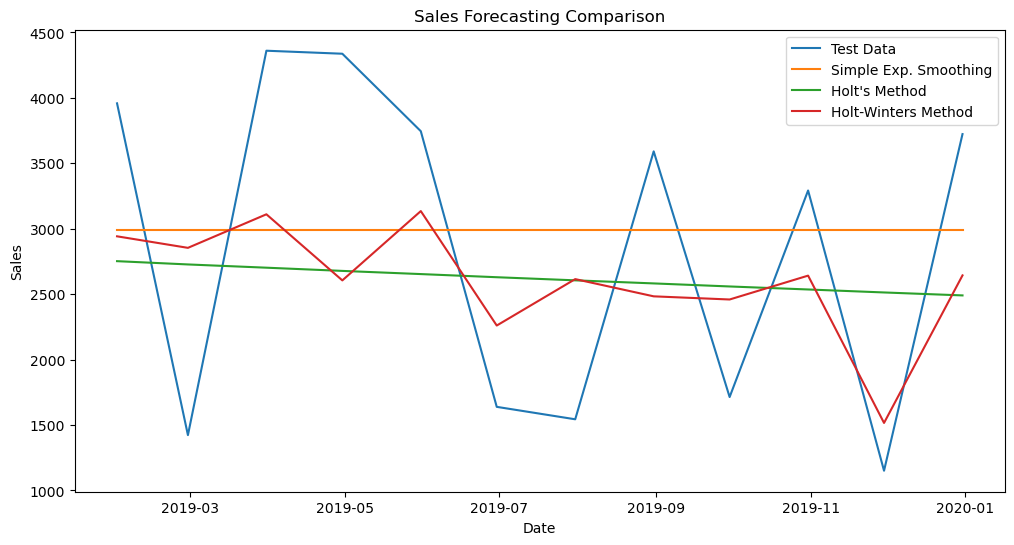

In [57]:
plt.figure(figsize=(12, 6))

# Plot actual sales data
plt.plot(test.index, test['Sales'], label='Test Data')

# Plot forecasts from Simple Exponential Smoothing
plt.plot(test.index, forecasts_simple, label='Simple Exp. Smoothing')

# Plot forecasts from Holt's model
plt.plot(test.index, forecasts_holt, label="Holt's Method")

# Plot forecasts from Holt-Winters model
plt.plot(test.index, forecasts_holt_winters, label="Holt-Winters Method")

plt.xlabel('Date')
plt.ylabel('Sales')
plt.title('Sales Forecasting Comparison')
plt.legend()
plt.show()

## 6. Application and Selection Criteria
- For each dataset, select the most appropriate forecasting model based on specific criteria such as Mean Absolute Error (MAE), - Mean Squared Error (MSE), and the Akaike Information Criterion (AIC).
Justify the selection of models for each dataset.

In [58]:
from statsmodels.tsa.holtwinters import SimpleExpSmoothing, Holt, ExponentialSmoothing
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [59]:
data_airline

,Passengers
Date,
2010-01-31,1480
2010-02-28,1358
2010-03-31,828
2010-04-30,1729
2010-05-31,385
...,...
2019-08-31,1917
2019-09-30,217
2019-10-31,616


In [60]:
from statsmodels.tsa.holtwinters import SimpleExpSmoothing
from sklearn.metrics import mean_absolute_error, mean_squared_error
import pandas as pd

def ses_model_for_multiple_dfs(dfs, df_columns):
    results = []

    for i, df in enumerate(dfs):
        train = df.iloc[:-int(len(df) * 0.2)]
        test = df.iloc[-int(len(df) * 0.2):]
        df_column = df_columns[i]  # Get corresponding column name for this dataframe

        model_ses = SimpleExpSmoothing(train[df_column]).fit(optimized=True)
        forecast_ses = model_ses.forecast(len(test))

        mae_ses = mean_absolute_error(test[df_column], forecast_ses)
        mse_ses = mean_squared_error(test[df_column], forecast_ses)
        aic_ses = model_ses.aic

        ses_result = pd.DataFrame({'Mean Absolute Error': [mae_ses],
                                   'Mean Squared Error': [mse_ses],
                                   'Akaike Information Criterion': [aic_ses]},
                                  index=[df_column])

        results.append(ses_result)

    return pd.concat(results)

In [61]:
def holt_linear_model_for_multiple_dfs(dfs, df_columns):
    results = []

    for i, df in enumerate(dfs):
        train = df.iloc[:-int(len(df) * 0.2)]
        test = df.iloc[-int(len(df) * 0.2):]
        df_column = df_columns[i]  # Get corresponding column name for this dataframe

        model_holt = Holt(train[df_column]).fit(optimized=True)
        forecast_holt = model_holt.forecast(len(test))

        mae_holt = mean_absolute_error(test[df_column], forecast_holt)
        mse_holt = mean_squared_error(test[df_column], forecast_holt)
        aic_holt = model_holt.aic

        holt_result = pd.DataFrame({'Mean Absolute Error': [mae_holt],
                                    'Mean Squared Error': [mse_holt],
                                    'Akaike Information Criterion': [aic_holt]},
                                   index=[df_column])

        results.append(holt_result)

    return pd.concat(results)


In [62]:
def holt_seasonal_model_for_multiple_dfs(dfs, df_columns):
    results = []

    for i, df in enumerate(dfs):
        train = df.iloc[:-int(len(df) * 0.2)]
        test = df.iloc[-int(len(df) * 0.2):]
        df_column = df_columns[i]  # Get corresponding column name for this dataframe

        model_holt_seasonal = ExponentialSmoothing(train[df_column], seasonal='add').fit(optimized=True)
        forecast_holt_seasonal = model_holt_seasonal.forecast(len(test))

        mae_holt_seasonal = mean_absolute_error(test[df_column], forecast_holt_seasonal)
        mse_holt_seasonal = mean_squared_error(test[df_column], forecast_holt_seasonal)
        aic_holt_seasonal = model_holt_seasonal.aic

        holt_seasonal_result = pd.DataFrame({'Mean Absolute Error': [mae_holt_seasonal],
                                             'Mean Squared Error': [mse_holt_seasonal],
                                             'Akaike Information Criterion': [aic_holt_seasonal]},
                                            index=[df_column])

        results.append(holt_seasonal_result)

    return pd.concat(results)

In [63]:
def find_best_model(df):
    # Calculate the minimum values for each error metric
    min_mae = df['Mean Absolute Error'].min()
    min_mse = df['Mean Squared Error'].min()
    min_aic = df['Akaike Information Criterion'].min()

    # Find the row(s) corresponding to the minimum values
    best_models = df[
        (df['Mean Absolute Error'] == min_mae) |
        (df['Mean Squared Error'] == min_mse) |
        (df['Akaike Information Criterion'] == min_aic)
    ]

    return best_models

In [64]:
dfs = [data_airline,data_electricity,data_sales,data_stocks]
df_columns = ['Passengers','Consumption','Sales','Closing Price']

In [65]:
ses_model_df = ses_model_for_multiple_dfs(dfs,df_columns)
ses_model_df

/Users/ben_nicholson/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
/Users/ben_nicholson/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  self._init_dates(dates, freq)
/Users/ben_nicholson/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
/Users/ben_nicholson/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


,Mean Absolute Error,Mean Squared Error,Akaike Information Criterion
Passengers,474.152955,2.993028e+05,1206.446991
Consumption,25.111212,8.393058e+02,94071.497677
Sales,1129.763744,1.463894e+06,675.037348
Closing Price,37.035566,1.876550e+03,6619.021218


In [66]:
ses_airline = ses_model_df[ses_model_df.index=='Passengers']
ses_electricity = ses_model_df[ses_model_df.index=='Consumption']
ses_sales = ses_model_df[ses_model_df.index=='Sales']
ses_stocks = ses_model_df[ses_model_df.index=='Closing Price']


In [67]:
holt_linear_df = holt_linear_model_for_multiple_dfs(dfs,df_columns)
holt_linear_df

/Users/ben_nicholson/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
/Users/ben_nicholson/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  self._init_dates(dates, freq)
/Users/ben_nicholson/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
/Users/ben_nicholson/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/holtwinters/model.py:915: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Users/ben_nicholson/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency in

,Mean Absolute Error,Mean Squared Error,Akaike Information Criterion
Passengers,474.870138,3.007570e+05,1222.101347
Consumption,340.212538,1.543301e+05,95312.641336
Sales,1187.301208,1.488388e+06,683.620635
Closing Price,430.894801,2.429116e+05,6764.283787


In [68]:
holt_linear_airline = holt_linear_df[holt_linear_df.index=='Passengers']
holt_linear_electricity = holt_linear_df[holt_linear_df.index=='Consumption']
holt_linear_sales = holt_linear_df[holt_linear_df.index=='Sales']
holt_linear_stocks = holt_linear_df[holt_linear_df.index=='Closing Price']

In [69]:
holt_seasonal_df = holt_seasonal_model_for_multiple_dfs(dfs,df_columns)
holt_seasonal_df

/Users/ben_nicholson/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
/Users/ben_nicholson/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  self._init_dates(dates, freq)
/Users/ben_nicholson/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
/Users/ben_nicholson/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


,Mean Absolute Error,Mean Squared Error,Akaike Information Criterion
Passengers,506.662322,343509.634596,1226.064418
Consumption,25.191066,849.543588,94352.093004
Sales,866.344961,997737.290135,690.610761
Closing Price,37.654897,1922.688153,6680.152921


In [70]:
holt_seasonal_airline = holt_seasonal_df[holt_seasonal_df.index=='Passengers']
holt_seasonal_electricity = holt_seasonal_df[holt_seasonal_df.index=='Consumption']
holt_seasonal_sales = holt_seasonal_df[holt_seasonal_df.index=='Sales']
holt_seasonal_stocks= holt_seasonal_df[holt_seasonal_df.index=='Closing Price']


In [71]:
holt_seasonal_airline.pd.concat(holt_linear_airline,ses_airline)

AttributeError: 'DataFrame' object has no attribute 'pd'

In [ ]:
concatenated_passengers = pd.concat([holt_seasonal_airline, holt_linear_airline, ses_airline], axis=0)
# Create a list of index values corresponding to each DataFrame
index_values = ['Holt Winter\'s Seasonal Method'] * len(holt_seasonal_airline) + ['Holt\'s Linear Method'] * len(holt_linear_airline) + ['SES'] * len(ses_airline)

# Assign the new index to the concatenated DataFrame
concatenated_passengers.index = index_values
concatenated_passengers

,Mean Absolute Error,Mean Squared Error,Akaike Information Criterion
Holt Winter's Seasonal Method,506.662322,343509.634596,1226.064418
Holt's Linear Method,474.870138,300756.985495,1222.101347
SES,474.152955,299302.758008,1206.446991


In [ ]:
find_best_model(concatenated_passengers)

,Mean Absolute Error,Mean Squared Error,Akaike Information Criterion
SES,474.152955,299302.758008,1206.446991


In [ ]:
concatenated_electricity = pd.concat([holt_seasonal_electricity, holt_linear_electricity, ses_electricity], axis=0)
# Create a list of index values corresponding to each DataFrame
index_values = ['Holt Winter\'s Seasonal Method'] * len(holt_seasonal_electricity) + ['Holt\'s Linear Method'] * len(holt_linear_electricity) + ['SES'] * len(ses_electricity)

# Assign the new index to the concatenated DataFrame
concatenated_electricity.index = index_values
concatenated_electricity

,Mean Absolute Error,Mean Squared Error,Akaike Information Criterion
Holt Winter's Seasonal Method,25.191066,849.543588,94352.093004
Holt's Linear Method,340.212538,154330.115639,95312.641336
SES,25.111212,839.305793,94071.497677


In [ ]:
find_best_model(concatenated_electricity)

,Mean Absolute Error,Mean Squared Error,Akaike Information Criterion
SES,25.111212,839.305793,94071.497677


In [ ]:
concatenated_sales = pd.concat([holt_seasonal_sales, holt_linear_sales, ses_sales], axis=0)
# Create a list of index values corresponding to each DataFrame
index_values = ['Holt Winter\'s Seasonal Method'] * len(holt_seasonal_sales) + ['Holt\'s Linear Method'] * len(holt_linear_sales) + ['SES'] * len(ses_sales)

# Assign the new index to the concatenated DataFrame
concatenated_sales.index = index_values
concatenated_sales

,Mean Absolute Error,Mean Squared Error,Akaike Information Criterion
Holt Winter's Seasonal Method,866.344961,9.977373e+05,690.610761
Holt's Linear Method,1187.301208,1.488388e+06,683.620635
SES,1129.763744,1.463894e+06,675.037348


In [ ]:
find_best_model(concatenated_sales)

,Mean Absolute Error,Mean Squared Error,Akaike Information Criterion
Holt Winter's Seasonal Method,866.344961,9.977373e+05,690.610761
SES,1129.763744,1.463894e+06,675.037348


In [ ]:
concatenated_stocks = pd.concat([holt_seasonal_stocks, holt_linear_stocks, ses_stocks], axis=0)
# Create a list of index values corresponding to each DataFrame
index_values = ['Holt Winter\'s Seasonal Method'] * len(holt_seasonal_airline) + ['Holt\'s Linear Method'] * len(holt_linear_airline) + ['SES'] * len(ses_airline)

# Assign the new index to the concatenated DataFrame
concatenated_stocks.index = index_values
concatenated_stocks

,Mean Absolute Error,Mean Squared Error,Akaike Information Criterion
Holt Winter's Seasonal Method,37.654897,1922.688153,6680.152921
Holt's Linear Method,430.894801,242911.616260,6764.283787
SES,37.035566,1876.550416,6619.021218


In [ ]:
find_best_model(concatenated_stocks)

,Mean Absolute Error,Mean Squared Error,Akaike Information Criterion
SES,37.035566,1876.550416,6619.021218


## 7. Reflection on Models and Real-World Applications
- Reflect on the performance of each model and discuss potential real-world applications where each model could be effectively utilized.
- Highlight scenarios where Holt’s model is preferred over SES due to its ability to capture trends, and explore real-world applications of the Holt-Winters Seasonal Model.